# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Theodorus Andang Jatmiko
- **Email:** 225150201111050
- **ID Dicoding:** MC006D5Y1490

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca (weathersit) terhadap jumlah total penyewaan sepeda (cnt) dan perbandingan antara pengguna kasual (casual) dan terdaftar (registered)?
2. Bagaimana tren penyewaan sepeda dari waktu ke waktu (berdasarkan tahun dan bulan)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from google.colab import files

## Data Wrangling

### Gathering Data

In [3]:
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Setelah mengunggah dan memuat kedua file CSV (day.csv dan hour.csv) ke dalam Pandas DataFrame, kita dapat melihat beberapa baris pertama dari masing-masing DataFrame menggunakan .head(). Ini memberikan gambaran awal tentang struktur data, nama kolom, dan format data yang ada. Kedua dataset tampaknya berisi informasi terkait penyewaan sepeda harian dan per jam, termasuk tanggal, kondisi cuaca, suhu, dan jumlah penyewaan (kasual, terdaftar, dan total).

### Assessing Data

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_validation_ranges = {
    'season': (1, 4),
    'yr': (0, 1),
    'mnth': (1, 12),
    'hr': (0, 23),
    'holiday': (0, 1),
    'weekday': (0, 6),
    'workingday': (0, 1),
    'weathersit': (1, 4),
}

In [11]:
def check_invalid_data(column, valid_range):
    return (column < valid_range[0]) | (column > valid_range[1])

In [12]:
invalid_data_summary = {}
for column, valid_range in hour_validation_ranges.items():
    invalid_count = check_invalid_data(hour_df[column], valid_range).sum()
    invalid_data_summary[column] = invalid_count

# Tampilkan hasil
for column, count in invalid_data_summary.items():
    if count > 0:
        print(f"Kolom '{column}' memiliki {count} data tidak valid.")
    else:
        print(f"Kolom '{column}' semua data valid.")

Kolom 'season' semua data valid.
Kolom 'yr' semua data valid.
Kolom 'mnth' semua data valid.
Kolom 'hr' semua data valid.
Kolom 'holiday' semua data valid.
Kolom 'weekday' semua data valid.
Kolom 'workingday' semua data valid.
Kolom 'weathersit' semua data valid.


Assessing day_df

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [15]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
day_validation_ranges = {
    'season': (1, 4),
    'yr': (0, 1),
    'mnth': (1, 12),
    'holiday': (0, 1),
    'weekday': (0, 6),
    'workingday': (0, 1),
    'weathersit': (1, 4),
}

In [18]:
def check_invalid_data(column, valid_range):
    return (column < valid_range[0]) | (column > valid_range[1])

In [19]:
invalid_data_summary = {}
for column, valid_range in day_validation_ranges.items():
    invalid_count = check_invalid_data(day_df[column], valid_range).sum()
    invalid_data_summary[column] = invalid_count

# Tampilkan hasil
for column, count in invalid_data_summary.items():
    if count > 0:
        print(f"Kolom '{column}' memiliki {count} data tidak valid.")
    else:
        print(f"Kolom '{column}' semua data valid.")

Kolom 'season' semua data valid.
Kolom 'yr' semua data valid.
Kolom 'mnth' semua data valid.
Kolom 'holiday' semua data valid.
Kolom 'weekday' semua data valid.
Kolom 'workingday' semua data valid.
Kolom 'weathersit' semua data valid.


**Insight:**
Setelah melakukan assessing pada kedua DataFrame (hour_df dan day_df):

Tidak ada missing values atau duplikasi pada kedua dataset, menunjukkan kualitas data yang baik untuk analisis lebih lanjut.
Ringkasan statistik deskriptif (.describe()) menunjukkan rentang nilai yang wajar untuk sebagian besar kolom numerik. Ada variasi yang signifikan pada kolom jumlah penyewaan ('casual', 'registered', 'cnt'), yang merupakan hal yang wajar.
Hasil validasi rentang data memastikan bahwa nilai-nilai dalam kolom kategorikal ('season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit') berada dalam rentang yang valid sesuai deskripsi dataset.
Kolom 'dteday' saat ini bertipe 'object' (string), yang perlu diubah menjadi tipe data datetime agar mudah untuk analisis berbasis waktu.

### Cleaning Data

In [20]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [21]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Kolom 'dteday' pada kedua dataset (hour_df dan day_df) telah berhasil diubah menjadi tipe data datetime (datetime64[ns]). Ini untuk memungkinkan analisis dan visualisasi berbasis waktu di langkah selanjutnya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [34]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Pertanyaan 1

In [50]:
# Analisis pengaruh cuaca terhadap jumlah total penyewaan sepeda
print("Analisis Pengaruh Cuaca terhadap Jumlah Total Penyewaan Sepeda:")
display(day_df.groupby('weathersit').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index())


Analisis Pengaruh Cuaca terhadap Jumlah Total Penyewaan Sepeda:


,weathersit,cnt,casual,registered
0,1,2257952,446346,1811606
1,2,996858,169776,827082
2,3,37869,3895,33974


In [51]:
# Analisis pengaruh cuaca terhadap rata-rata penyewaan harian
print("\nAnalisis Pengaruh Cuaca terhadap Rata-rata Penyewaan Harian:")
display(day_df.groupby('weathersit').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index())


Analisis Pengaruh Cuaca terhadap Rata-rata Penyewaan Harian:


,weathersit,cnt,casual,registered
0,1,4876.786177,964.030238,3912.755940
1,2,4035.862348,687.352227,3348.510121
2,3,1803.285714,185.476190,1617.809524


In [52]:
# Analisis pengaruh cuaca terhadap suhu dan kelembaban (menggunakan day_df)
print("\nAnalisis Pengaruh Cuaca terhadap Suhu dan Kelembaban:")
display(day_df.groupby('weathersit').agg({
    'temp': ['mean', 'min', 'max'],
    'hum': ['mean', 'min', 'max']
}).reset_index())


Analisis Pengaruh Cuaca terhadap Suhu dan Kelembaban:


weathersit      temp                          hum                    
                  mean      min       max      mean       min       max
0          1  0.511541  0.05913  0.861667  0.565594  0.187917  0.835833
1          2  0.470366  0.10750  0.815000  0.725887  0.407083  0.972500
2          3  0.433440  0.21750  0.633913  0.848872  0.000000  0.970417

Pertanyaan 2

In [53]:
# Analisis tren penyewaan berdasarkan tahun (menggunakan day_df)
print("Analisis Tren Penyewaan Berdasarkan Tahun:")
display(day_df.groupby('yr').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index())


Analisis Tren Penyewaan Berdasarkan Tahun:


,yr,cnt,casual,registered
0,0,1243103,247252,995851
1,1,2049576,372765,1676811


In [54]:
# Analisis tren penyewaan berdasarkan bulan (menggunakan day_df)
print("\nAnalisis Tren Penyewaan Berdasarkan Bulan:")
display(day_df.groupby('mnth').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index())


Analisis Tren Penyewaan Berdasarkan Bulan:


,mnth,cnt,casual,registered
0,1,134933,12042,122891
1,2,151352,14963,136389
2,3,228920,44444,184476
3,4,269094,60802,208292
4,5,331686,75285,256401
5,6,346342,73906,272436
6,7,344948,78157,266791
7,8,351194,72039,279155
8,9,345991,70323,275668
9,10,322352,59760,262592


In [55]:
# Analisis tren penyewaan berdasarkan bulan dan tahun (menggunakan day_df)
print("\nAnalisis Tren Penyewaan Berdasarkan Bulan dan Tahun:")
display(day_df.groupby(['yr', 'mnth']).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index())


Analisis Tren Penyewaan Berdasarkan Bulan dan Tahun:


,yr,mnth,cnt,casual,registered
0,0,1,38189,3073,35116
1,0,2,48215,6242,41973
2,0,3,64045,12826,51219
3,0,4,94870,22346,72524
4,0,5,135821,31050,104771
5,0,6,143512,30612,112900
6,0,7,141341,36452,104889
7,0,8,136691,28842,107849
8,0,9,127418,26545,100873
9,0,10,123511,25222,98289


### Analisis Korelasi Antar Variabel Numerik

Matriks Korelasi Antar Variabel Numerik:


,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


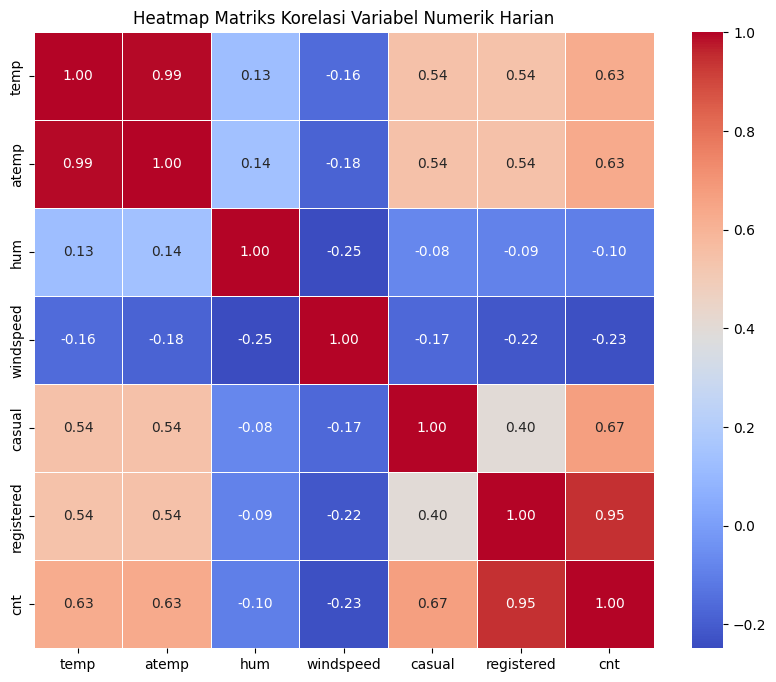

In [67]:
# Memilih kolom numerik untuk analisis korelasi
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menghitung matriks korelasi
correlation_matrix = day_df[numerical_cols].corr()

print("Matriks Korelasi Antar Variabel Numerik:")
display(correlation_matrix)

# Visualisasi Matriks Korelasi menggunakan Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi Variabel Numerik Harian')
plt.show()

Insight Analisis Korelasi:

Terlihat korelasi positif yang kuat antara cnt (jumlah total penyewaan) dengan temp (suhu) dan atemp (suhu terasa). Ini menunjukkan bahwa semakin hangat cuacanya, semakin banyak sepeda yang disewa.
Ada korelasi positif yang sangat kuat antara cnt dengan registered dan casual, yang sudah diduga karena cnt adalah jumlah dari keduanya.
Kolom registered memiliki korelasi positif yang lebih kuat dengan suhu (temp, atemp) dibandingkan casual.
hum (kelembaban) memiliki korelasi negatif dengan cnt, casual, dan registered, meskipun tidak terlalu kuat. Kelembaban tinggi mungkin sedikit mengurangi minat menyewa sepeda.
windspeed (kecepatan angin) memiliki korelasi negatif yang lemah dengan jumlah penyewaan. Angin kencang mungkin sedikit menghambat.
temp dan atemp berkorelasi sangat kuat satu sama lain, yang wajar karena atemp adalah "suhu yang dirasakan" yang sangat terkait dengan suhu aktual.

**Insight:**
Setelah melakukan analisis eksplorasi data (EDA) dan melihat statistik deskriptif serta hasil grouping:

Terlihat perbedaan signifikan dalam jumlah penyewaan sepeda berdasarkan kondisi cuaca (weathersit). Cuaca cerah (weathersit 1) memiliki jumlah penyewaan total tertinggi, sementara cuaca buruk (weathersit 3) memiliki yang terendah.
Pengguna terdaftar (registered) secara konsisten menyumbang jumlah penyewaan yang jauh lebih tinggi dibandingkan pengguna kasual (casual) di semua kondisi cuaca dan periode waktu yang dianalisis.
Tren penyewaan total dan per jenis pengguna (kasual vs terdaftar) menunjukkan pola musiman yang jelas, dengan puncak di bulan-bulan pertengahan tahun (musim semi/panas) dan penurunan di bulan-bulan akhir/awal tahun (musim gugur/dingin).
Ada peningkatan tren penyewaan total dari tahun 2011 ke tahun 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Cuaca dan Perbandingan Pengguna

In [56]:
# Analisis pengaruh cuaca terhadap jumlah total penyewaan sepeda
weather_impact_total = day_df.groupby('weathersit').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

weather_impact_mean = day_df.groupby('weathersit').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

In [57]:
# Mapping nilai weathersit ke label yang lebih deskriptif
weather_labels = {
    1: 'Cerah/Sedikit Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan Ringan',
    4: 'Hujan Lebat/Salju Lebat'
}
weather_impact_total['weathersit_label'] = weather_impact_total['weathersit'].map(weather_labels)
weather_impact_mean['weathersit_label'] = weather_impact_mean['weathersit'].map(weather_labels)


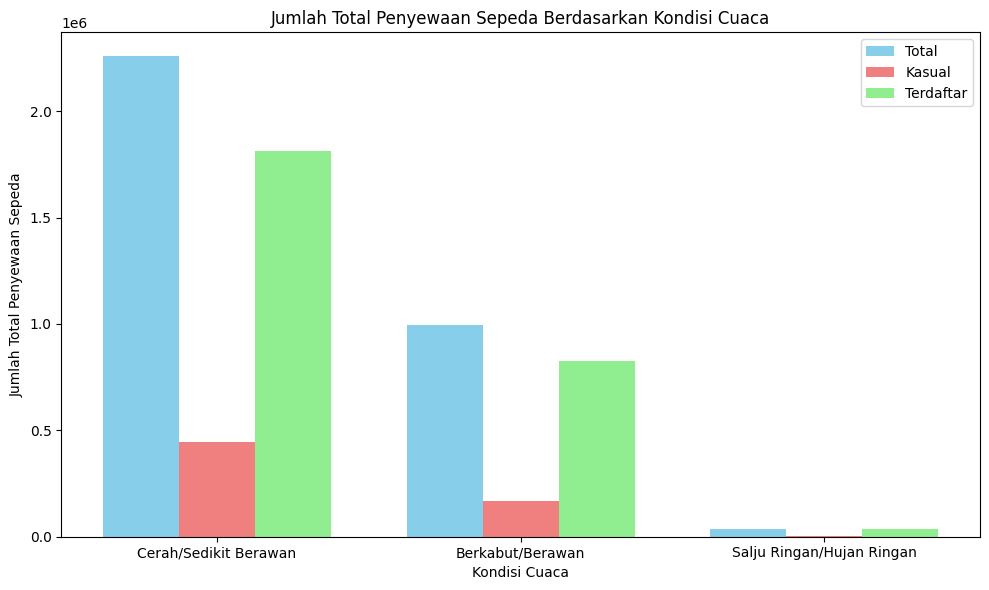

In [58]:
# Visualisasi Jumlah Total Penyewaan berdasarkan Cuaca
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(weather_impact_total['weathersit_label']))

plt.bar(index, weather_impact_total['cnt'], bar_width, label='Total', color='skyblue')
plt.bar(index + bar_width, weather_impact_total['casual'], bar_width, label='Kasual', color='lightcoral')
plt.bar(index + 2 * bar_width, weather_impact_total['registered'], bar_width, label='Terdaftar', color='lightgreen')

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.title('Jumlah Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(index + bar_width, weather_impact_total['weathersit_label'])
plt.legend()
plt.tight_layout()
plt.show()


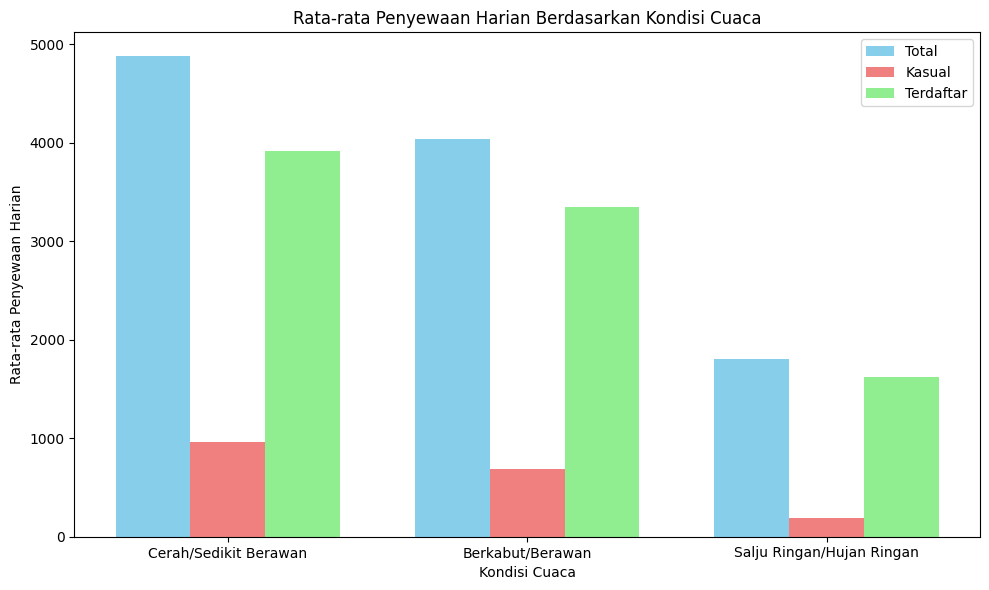

In [59]:
# Visualisasi Rata-rata Penyewaan Harian berdasarkan Cuaca
plt.figure(figsize=(10, 6))
index = np.arange(len(weather_impact_mean['weathersit_label']))

plt.bar(index, weather_impact_mean['cnt'], bar_width, label='Total', color='skyblue')
plt.bar(index + bar_width, weather_impact_mean['casual'], bar_width, label='Kasual', color='lightcoral')
plt.bar(index + 2 * bar_width, weather_impact_mean['registered'], bar_width, label='Terdaftar', color='lightgreen')

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Harian')
plt.title('Rata-rata Penyewaan Harian Berdasarkan Kondisi Cuaca')
plt.xticks(index + bar_width, weather_impact_mean['weathersit_label'])
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 2: Tren Penyewaan dari Waktu ke Waktu

In [60]:
# Analisis tren penyewaan berdasarkan bulan dan tahun
monthly_yearly_trend = day_df.groupby(['yr', 'mnth']).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

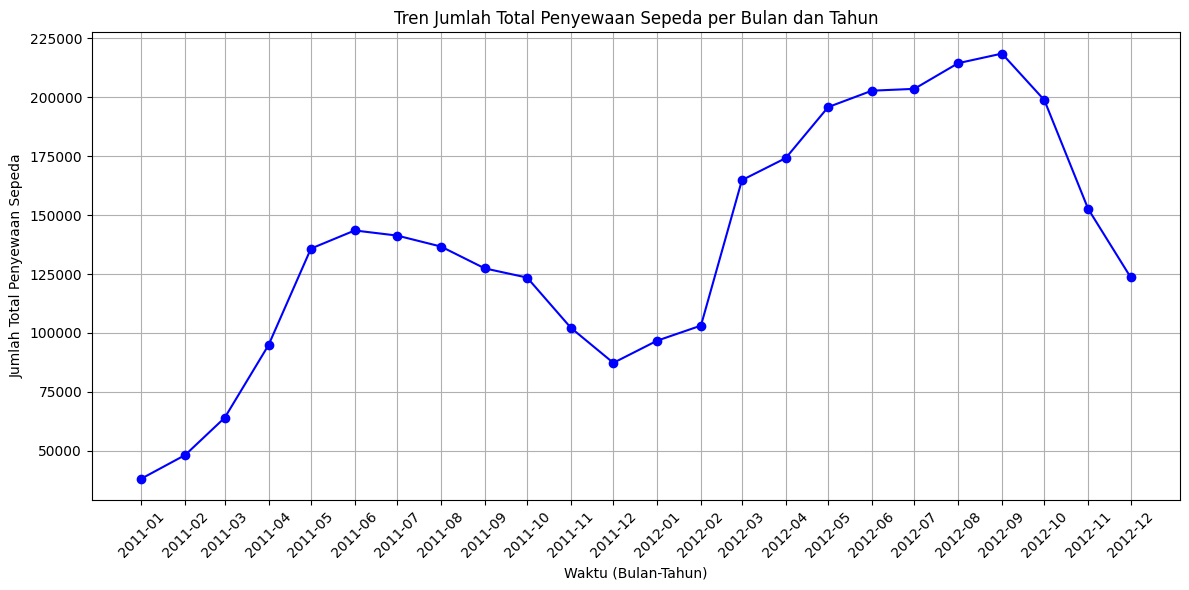

In [63]:
# Menggabungkan tahun dan bulan untuk sumbu x
# Tambahkan 2011 ke kolom 'yr' untuk mendapatkan tahun yang benar
monthly_yearly_trend['year_month'] = pd.to_datetime((monthly_yearly_trend['yr'] + 2011).astype(str) + '-' + monthly_yearly_trend['mnth'].astype(str) + '-01')

# Visualisasi Tren Penyewaan Total per Bulan dan Tahun
plt.figure(figsize=(12, 6))
plt.plot(monthly_yearly_trend['year_month'], monthly_yearly_trend['cnt'], marker='o', linestyle='-', color='blue')
plt.xlabel('Waktu (Bulan-Tahun)')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.title('Tren Jumlah Total Penyewaan Sepeda per Bulan dan Tahun')
plt.grid(True)
plt.xticks(monthly_yearly_trend['year_month'], monthly_yearly_trend['year_month'].dt.strftime('%Y-%m'), rotation=45) # Format x-axis labels
plt.tight_layout()
plt.show()



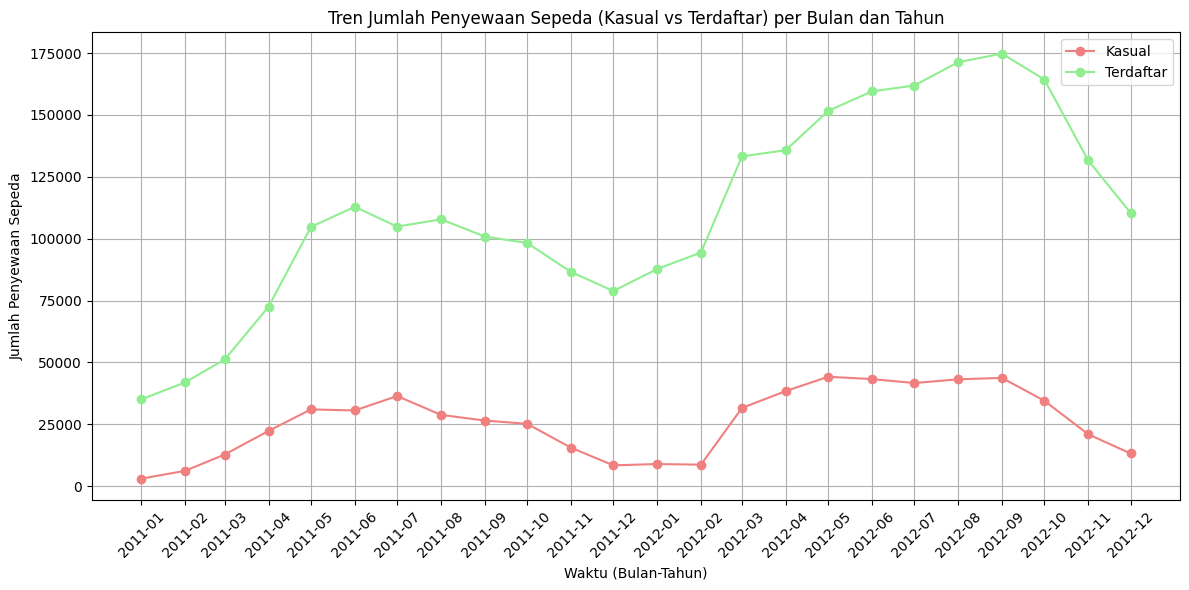

In [64]:
# Visualisasi Tren Penyewaan Kasual dan Terdaftar per Bulan dan Tahun
plt.figure(figsize=(12, 6))
plt.plot(monthly_yearly_trend['year_month'], monthly_yearly_trend['casual'], marker='o', linestyle='-', color='lightcoral', label='Kasual')
plt.plot(monthly_yearly_trend['year_month'], monthly_yearly_trend['registered'], marker='o', linestyle='-', color='lightgreen', label='Terdaftar')
plt.xlabel('Waktu (Bulan-Tahun)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Tren Jumlah Penyewaan Sepeda (Kasual vs Terdaftar) per Bulan dan Tahun')
plt.grid(True)
plt.xticks(monthly_yearly_trend['year_month'], monthly_yearly_trend['year_month'].dt.strftime('%Y-%m'), rotation=45) # Format x-axis labels
plt.legend()
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

### Analisis Pengaruh Musim

Analisis Pengaruh Musim terhadap Rata-rata Penyewaan Harian:


,season,cnt,casual,registered,season_label
0,1,2604.132597,334.928177,2269.204420,Semi
1,2,4992.331522,1106.097826,3886.233696,Panas
2,3,5644.303191,1202.611702,4441.691489,Gugur
3,4,4728.162921,729.112360,3999.050562,Dingin


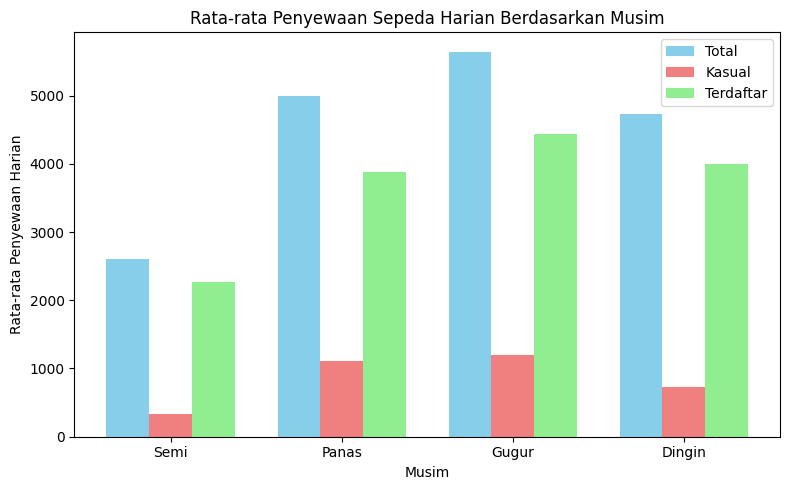

In [66]:
# Analisis pengaruh musim (season) terhadap jumlah penyewaan sepeda (menggunakan day_df)
season_impact = day_df.groupby('season').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Mapping nilai season ke label yang lebih deskriptif
season_labels = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
}
season_impact['season_label'] = season_impact['season'].map(season_labels)

print("Analisis Pengaruh Musim terhadap Rata-rata Penyewaan Harian:")
display(season_impact)

# Visualisasi Pengaruh Musim
plt.figure(figsize=(8, 5))
index = np.arange(len(season_impact['season_label']))
bar_width = 0.25

plt.bar(index, season_impact['cnt'], bar_width, label='Total', color='skyblue')
plt.bar(index + bar_width, season_impact['casual'], bar_width, label='Kasual', color='lightcoral')
plt.bar(index + 2 * bar_width, season_impact['registered'], bar_width, label='Terdaftar', color='lightgreen')

plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Harian')
plt.title('Rata-rata Penyewaan Sepeda Harian Berdasarkan Musim')
plt.xticks(index + bar_width, season_impact['season_label'])
plt.legend()
plt.tight_layout()
plt.show()

**Insight Analisis Musim:**
- Musim gugur (season 3) memiliki rata-rata penyewaan harian tertinggi secara keseluruhan, diikuti oleh musim panas (season 2).
- Musim semi (season 1) memiliki rata-rata penyewaan harian terendah secara signifikan.
- Pengguna kasual sangat dipengaruhi oleh musim, dengan rata-rata penyewaan tertinggi di musim panas dan gugur, dan sangat rendah di musim dingin.
- Pengguna terdaftar juga menunjukkan pola musiman, tetapi perbedaannya tidak sedrastis pengguna kasual, menegaskan kembali bahwa pengguna terdaftar lebih konsisten dalam penggunaan sepeda mereka.

## Conclusion

**Conclution Pertanyaan 1:**

Berdasarkan visualisasi di atas:
- Kondisi cuaca 1 (Cerah/Sedikit Berawan) memiliki jumlah total dan rata-rata penyewaan sepeda tertinggi, baik untuk pengguna kasual maupun terdaftar.
- Kondisi cuaca 3 (Salju Ringan/Hujan Ringan) memiliki jumlah total dan rata-rata penyewaan sepeda terendah secara signifikan.
- Pengguna terdaftar secara konsisten menyewa sepeda lebih banyak daripada pengguna kasual di semua kondisi cuaca. Perbedaan ini sangat mencolok, menunjukkan bahwa pengguna terdaftar adalah kontributor utama terhadap total penyewaan.
- Penurunan penyewaan pada kondisi cuaca yang buruk (cuaca 2 dan 3) lebih drastis untuk pengguna kasual dibandingkan pengguna terdaftar, yang mungkin menunjukkan bahwa pengguna terdaftar lebih bergantung pada sepeda sebagai moda transportasi, terlepas dari cuaca ringan hingga sedang.

**Analisis Penjelasan Pertanyaan 2:**

Berdasarkan visualisasi tren waktu:
- Terdapat tren peningkatan jumlah total penyewaan sepeda dari tahun 2011 ke tahun 2012.
- Secara musiman, penyewaan cenderung meningkat pada bulan-bulan pertengahan tahun (sekitar Mei hingga Oktober) dan menurun pada bulan-bulan awal dan akhir tahun (sekitar November hingga Februari). Hal ini kemungkinan besar terkait dengan faktor cuaca dan musim (musim semi dan panas biasanya lebih populer untuk bersepeda).
- Pengguna terdaftar menunjukkan pola tren musiman yang serupa dengan total penyewaan, tetapi dengan jumlah yang jauh lebih tinggi dibandingkan pengguna kasual di sepanjang waktu.
- Pengguna kasual juga menunjukkan pola musiman, tetapi puncaknya lebih tajam di bulan-bulan musim panas dibandingkan pengguna terdaftar, menunjukkan bahwa pengguna kasual lebih sensitif terhadap kondisi cuaca hangat dan cerah.

In [65]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.7.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.2.0.38.23
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.5.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.4
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.0
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy

In [72]:
day_df.to_csv('day_cleaned.csv', index=False)
hour_df.to_csv('hour_cleaned.csv', index=False)